# Prediction using Supervised ML
This Project utilizes simple linear regression using two variables to predict the percentage of marks that a student is expected to score based upon the number of hours they studied

## Author: Vaishnavi R.

Importing necessaery libraries

In [1]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline

Reading data from the given dataset

In [2]:
link = "http://bit.ly/w-data"
stu_data = pd.read_csv(link)

print("Imported Data:")
stu_data.head(10)

Imported Data:


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


## Plotting a 2 Dimensional graph to visualise the relationiship of data members

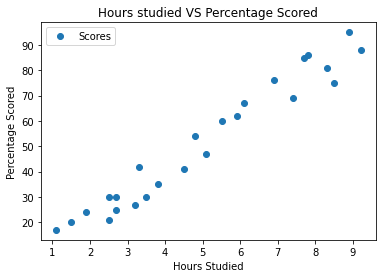

In [3]:
# Plotting the distribution of scores
stu_data.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours studied VS Percentage Scored')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Scored')  
plt.show()

From the above graph, it is observed that the hours studied and the percentage scored by the students share a positive linear relationship

## Preparing Data to train the algorithm
Here we divide the data into inputs and labels

In [4]:
A = stu_data.iloc[:, :-1].values  
B = stu_data.iloc[:, 1].values

### Splitting data training sets and test sets

In [5]:
#Use Scikit's Learn to split data into train and test sets 
from sklearn.model_selection import train_test_split  
A_train, A_test, B_train, B_test = train_test_split(A, B, 
                            test_size=0.2, random_state=0)

### Training the algorithm

In [6]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(A_train, B_train) 

print("Algorithm Training Successfully completed")

Algorithm Training Successfully completed


### Plotting the regression line and the test data

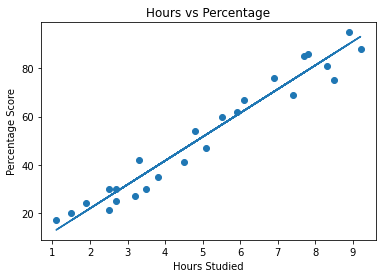

[9.91065648]


In [7]:
line = regressor.coef_*A+regressor.intercept_

plt.scatter(A, B)
plt.plot(A, line);
plt.title('Hours vs Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.show()

print(regressor.coef_)

## Predicting student performance
predicting student performance using the traained algorithm

In [8]:
print(A_test)
B_predict = regressor.predict(A_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [9]:
df = pd.DataFrame({'Actual': B_test, 'Predicted': B_predict})  
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [10]:
hours = 9.25
own_pred = regressor.predict(np.array([hours]).reshape(1,1))
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = 93.69173248737538


### Evaluating performance of the algorithm
calculating the absolute mean error as a metric to check performance of the algorithm

In [11]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(B_test, B_predict))

Mean Absolute Error: 4.18385989900298
